# Clustering

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import AA_utils 
from sklearn.metrics import  silhouette_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [4]:
datadir = '/home/sebacastillo/PycharmProjects/research_tools/data/'

# K-means

In [44]:
# cargar dataset
dataset= 'who_life_expectancy.csv'
df=pd.read_csv(datadir+dataset)
# transformar a numpy
# data= df.values

# Limpieza
df = df.drop(columns=['Country', 'Year', 'Status', 'Population'])
df = df.dropna()

# Normalizaciòn
scaler = MinMaxScaler()
#df = scaler.fit_transform(df)

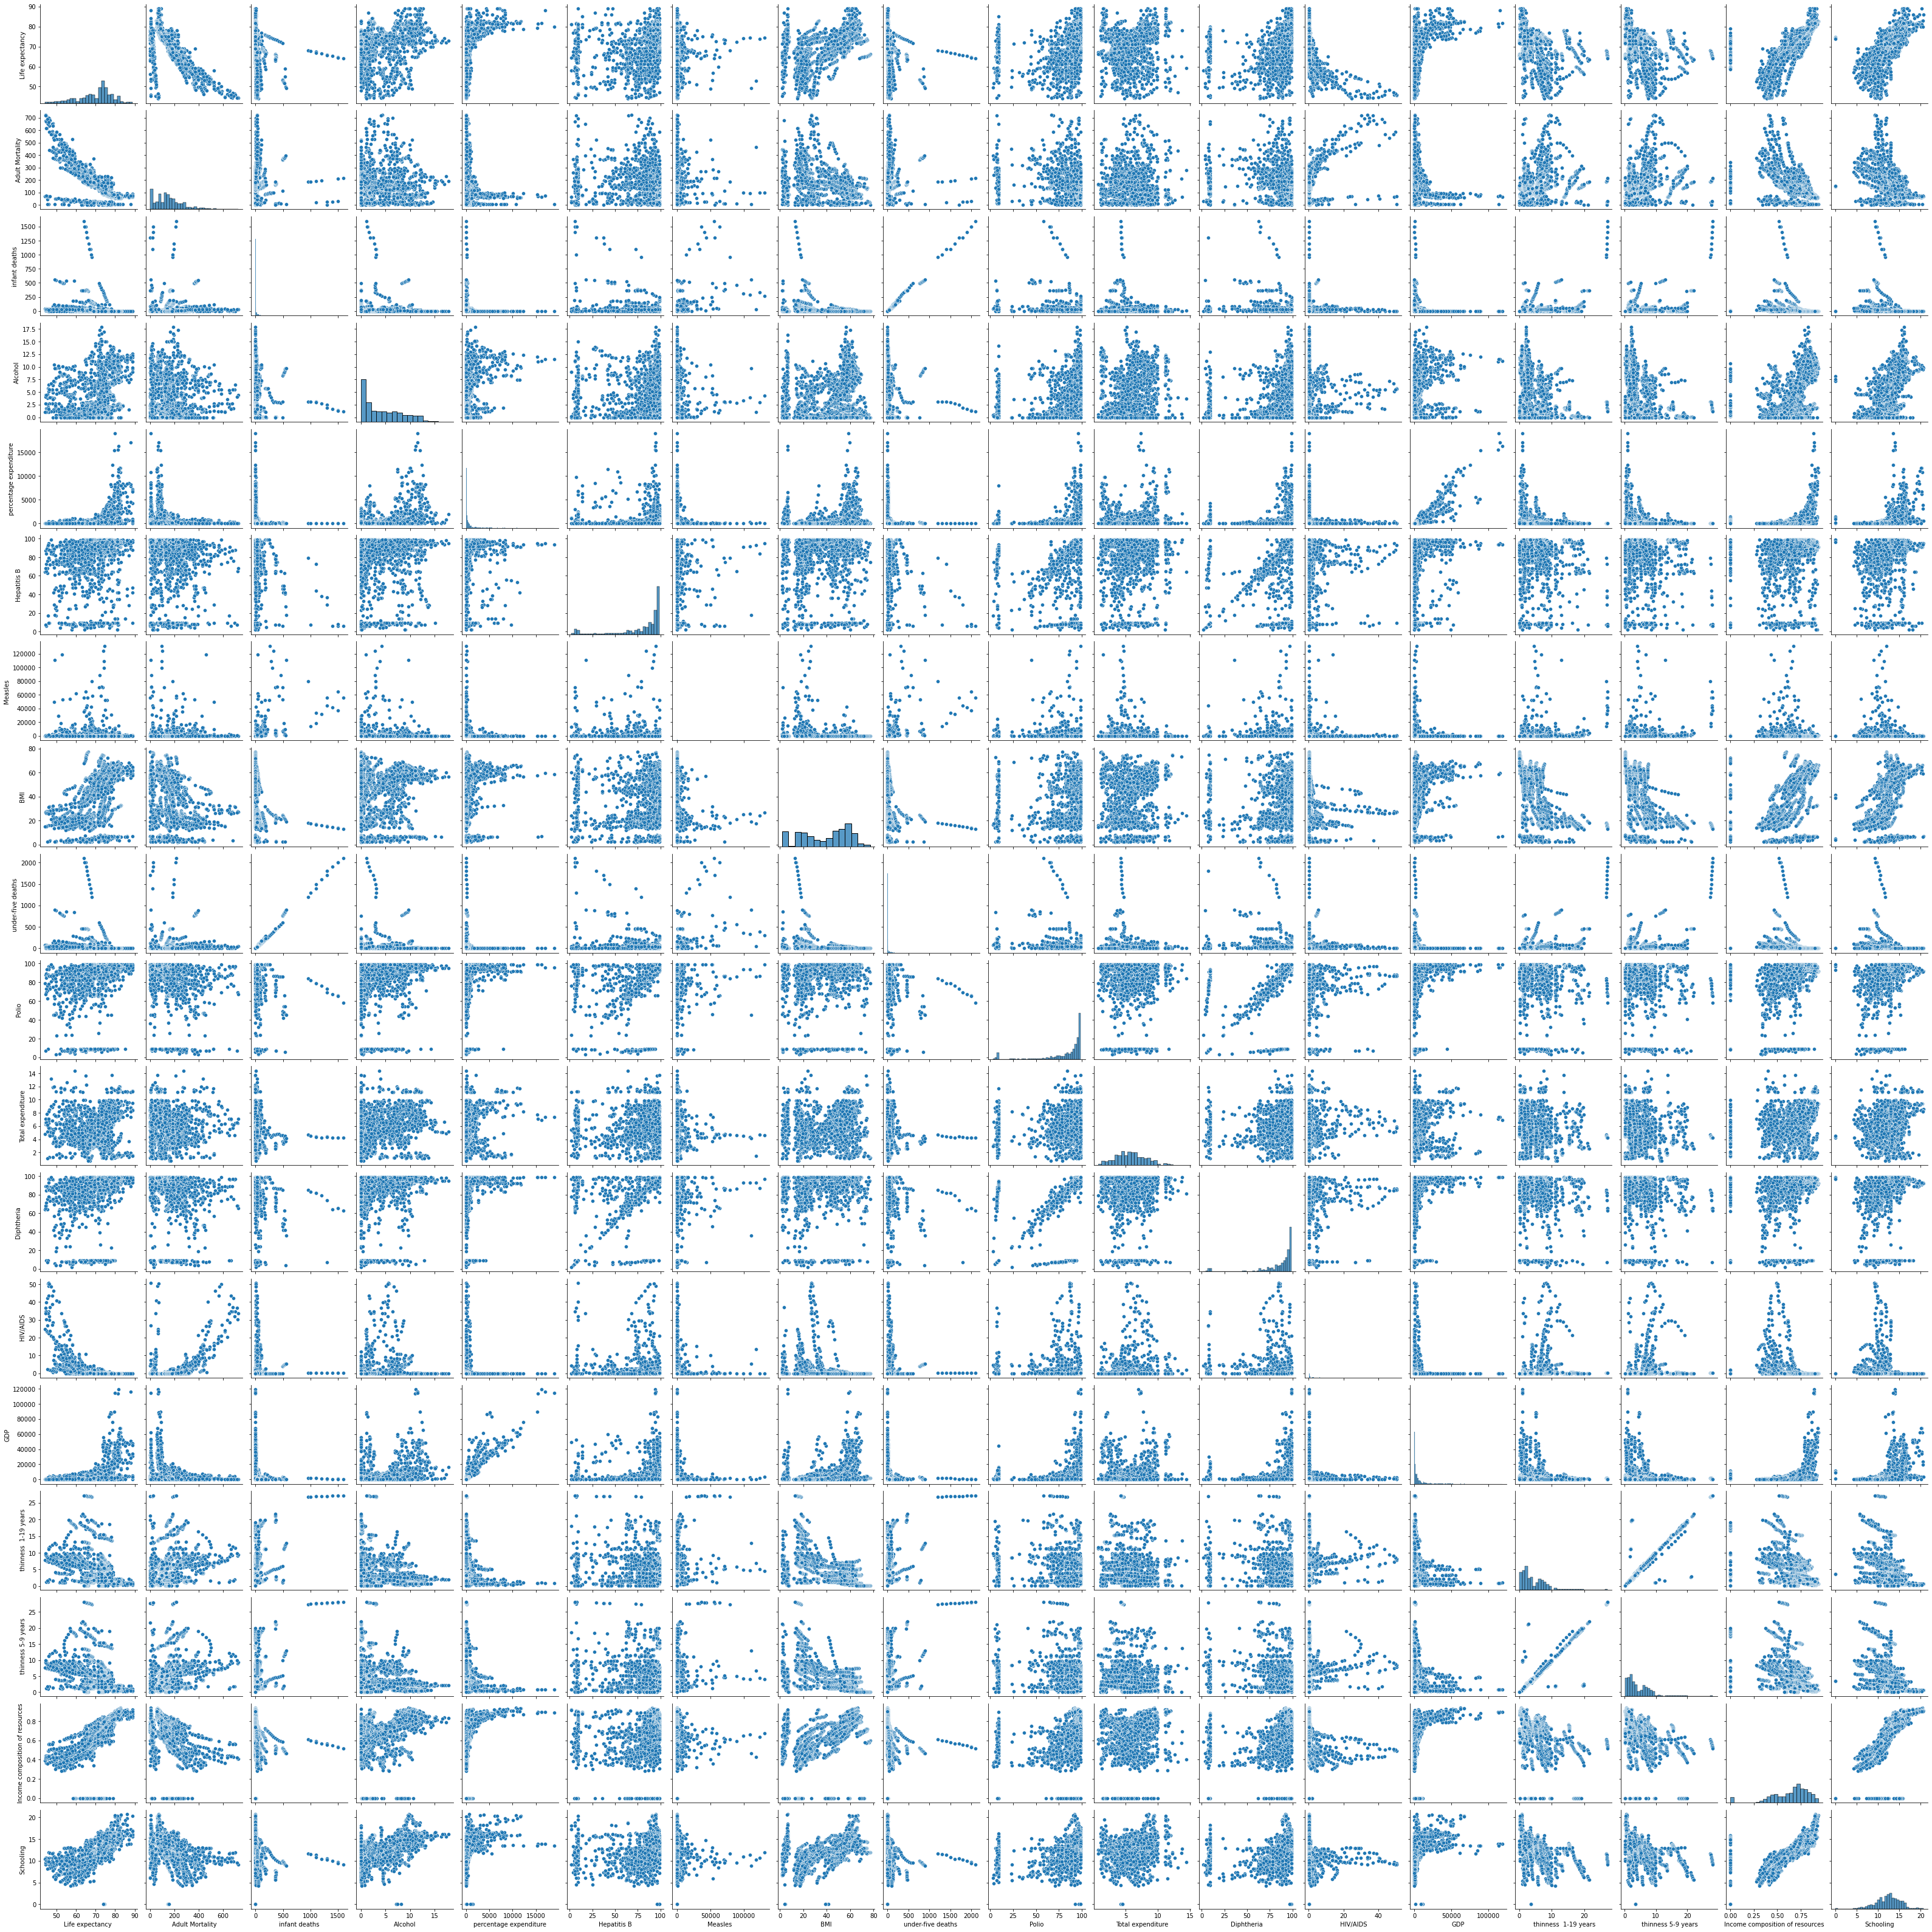

In [36]:
sns.pairplot(df);


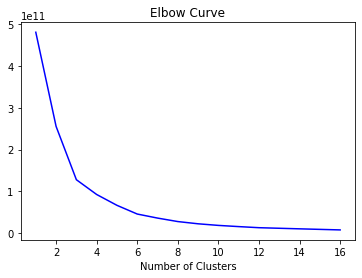

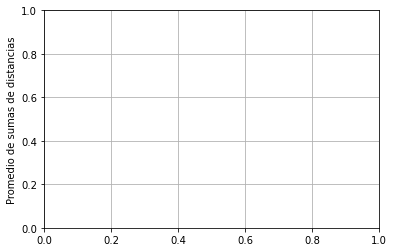

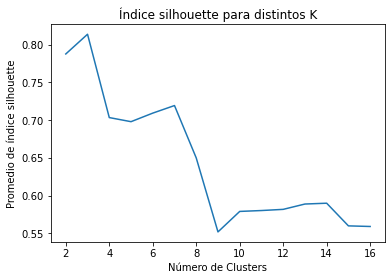

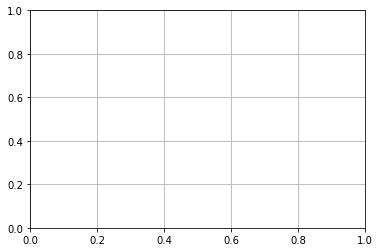

In [45]:
#%% visualizar curva elbow y silhouette
AA_utils.graficar_punto_elbow(df, 16)
AA_utils.graficar_indice_silhouette(df, 16)

K = 3 The average silhouette_score is : 0.8138532317568493


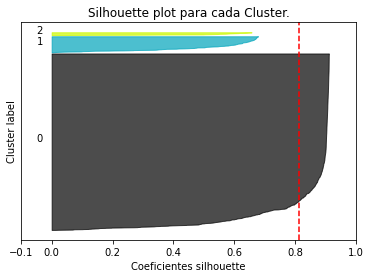

In [47]:
#--------------Entrenar modelo----------
# Parametros ----------------------------
k= 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(df)

# clasificar cada patrón con los centroides
kmeans_labels = kmeans.predict(df)

# centroides
centers = kmeans.cluster_centers_

#%% analisis del clustering
silhouette_avg = silhouette_score(df, kmeans_labels)
print("K =", k, "The average silhouette_score is :", silhouette_avg)
AA_utils.graficar_indice_silhouette_k(df, k)

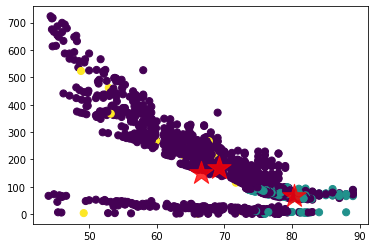

In [48]:
#%% visualizar predicción
plt.figure()
data= df.values
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, s=50, cmap='viridis')
# visualizar centros
plt.scatter(centers[:, 0], centers[:, 1],marker='*', c='red',s=600, alpha=0.8)


### Conclusion
Sin normalizar la clasificación k-means ofrece resultados aceptables para un cluster. Aunque tiene una distribución de datos no euclideana. Los centros no son representativos, ni se constatan patrones de agrupamientos útiles.

# GMM

In [27]:
# Imports varios ----------------------------------------
import matplotlib.pyplot as plt
import AA_utils 
from sklearn.mixture import  GaussianMixture
import pandas as pd
plt.close('all')


In [28]:
datadir = '/home/sebacastillo/PycharmProjects/research_tools/data/'

In [29]:
# cargar dataset
dataset= 'who_life_expectancy.csv'
df=pd.read_csv(datadir+dataset)
# transformar a numpy
# data= df.values

# Limpieza
df = df.drop(columns=['Country', 'Year', 'Status', 'Population'])
df = df.dropna()

In [31]:
# Normalizaciòn
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
data = df

#%% fit a Gaussian Mixture Model 
k= 4

model = GaussianMixture(n_components=k) # crea el modelo
model.fit(data) # entrena el modelo con EM
scores= model.score_samples(data) # log(verosimilitud) de cada patrón
labels= model.predict(data) # etiqueta de cada dato (clusters)
probs= model.predict_proba(data)
print('Score del modelo: ', model.score(data))


Score del modelo:  31.715955439555554


In [ ]:
AA_utils.graficar_GMM(data, model, labels=False)

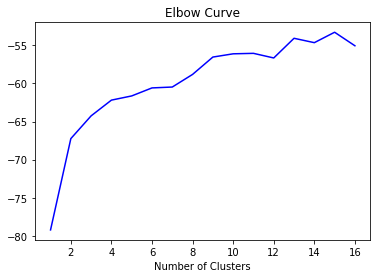

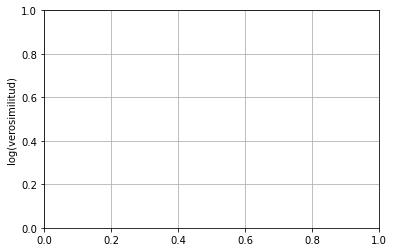

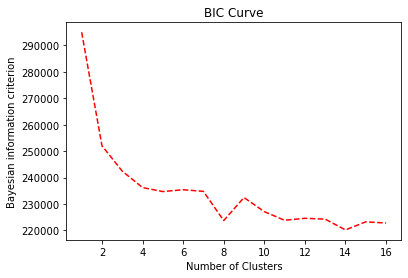

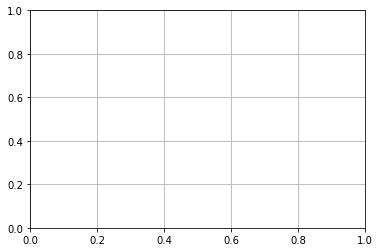

In [52]:
AA_utils.graficar_punto_elbow(data,16, GMM=True)

In [60]:
#%%  visualizar scores
scores= model.score_samples(data)
#scores= np.exp(scores) # Convertir a probabilidades

#  detectar anómalos
u_scores= np.mean(scores)
s_scores= np.std(scores)
linea_de_corte= u_scores - 4*s_scores
anomalos_ind= scores< linea_de_corte
anomalos= data[anomalos_ind]

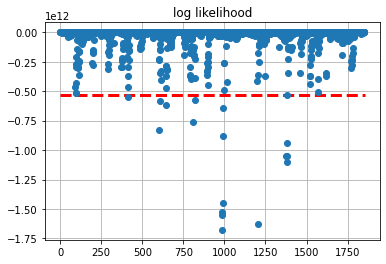

In [61]:

plt.figure()
plt.title('log likelihood')
plt.plot(scores, 'o')
plt.hlines(linea_de_corte, 0, data.shape[0], color='r', linestyle='--', linewidth= 3)
plt.grid();